<a href="https://colab.research.google.com/github/ChipoEllen/Masters-project/blob/main/Feature_Slicing_KAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the required libraries**

In [ ]:
import numpy as np
import os
import pandas as pd
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif

# **Finds where the csv file is located and reads the file and saves in a variable named df**

In [ ]:
# Finds where the csv is located and reads it

file_path = "/content/Telco-Customer-Churn.csv"


df = pd.read_csv(file_path)
df1 = df.copy(deep = True) # creates a copy of df into df1
# creating a duplicate so the changes made in df1 wont show up in df\# creating a duplicate because in the charts Churn_Y and Churn_N columns will be created for visualisation in graphs
df1.drop(columns = ['customerID'], inplace = True)# removing the customerID column because it doesnt contribute anything



# **Shows the first 5 rows of the data frame**

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Shows the last 5 rows of the data**

In [ ]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# gives size of the data frame
df.shape

(7043, 21)

# **To check the data type and if there are NaN variables**

In [ ]:
# Gives summary of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Showing the text columns with unique values**

In [ ]:
# Selecting only text columns
text_columns = df.select_dtypes(include='object')

# Counting unique values per text column
unique_counts = text_columns.nunique()
print(unique_counts)

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64


# **Gives the stastics for the numeric columns  below (Columns with int and float data types)**

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Checks if there are null values in the data frame**

In [ ]:

#Note to self could not see blank spaces in TotalCharges
df.isnull().values.any()


np.False_

In [ ]:
# it says there are no nulls but had issues
null_values = df['TotalCharges'].isnull()
print(null_values)

blanks =  df['TotalCharges'] == ''

print(blanks)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool


# **Checks all the columns if there are null values**

In [ ]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# **Data Visualisation and Analysis**

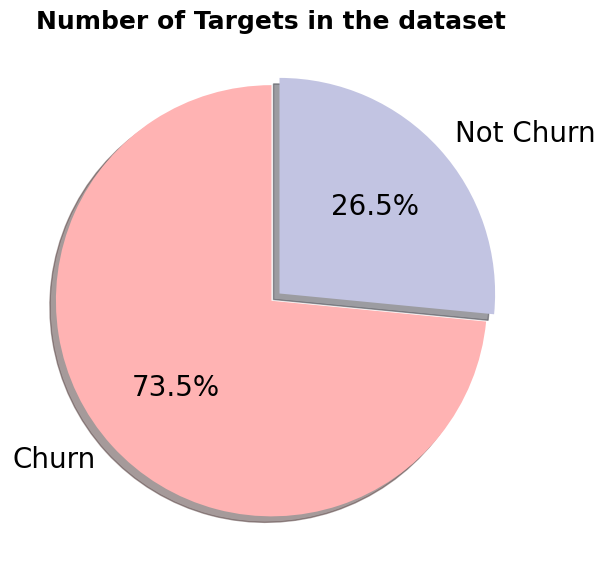

In [ ]:
labels = ['Churn', 'Not Churn']
sizes = df['Churn'].value_counts(sort = True)

colors = ["#ffb3b3","#C2C4E2"]
explode = (0.05,0)

plt.figure(figsize=(7,7))
plt.suptitle("Number of Targets in the dataset",y=0.9, size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,
        startangle=90, textprops={"fontsize":20})

plt.show()


# **Checking the relationship between charges and churn on a scatter plot**



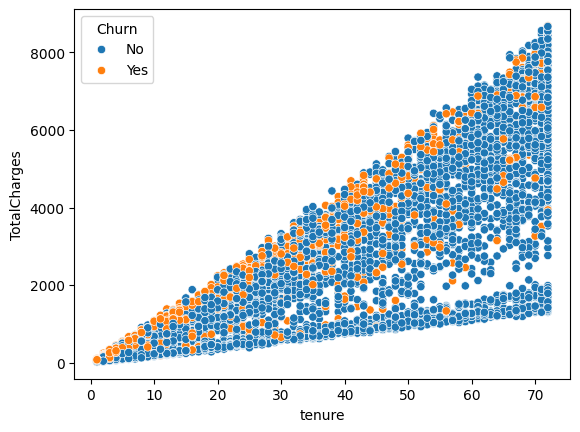

In [ ]:
# note there are  some empty spaces in TotalCharges

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df = df.dropna(subset=['TotalCharges'])

# Plotting the scatterplot
#sns.lmplot(x="tenure", y="TotalCharges", hue="Churn", data=df)
#plt.show()

sns.scatterplot(x=df['tenure'], y=df['TotalCharges'], hue=df['Churn'])
plt.show()


# **Checking the distribution between tenure and churn on a histogram**

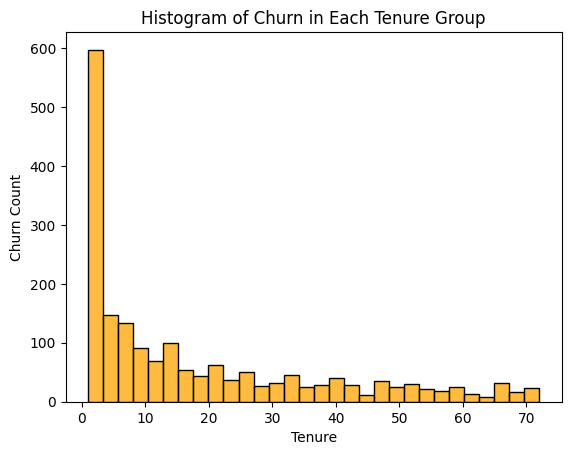

In [ ]:
# Create a new column for Churn = 'Yes' as 1, otherwise 0
df['Churn_Y'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Use the original DataFrame with the new column
sns.histplot(x='tenure', weights='Churn_Y', data=df, bins=30, color="orange")

# Add title and labels
plt.title("Histogram of Churn in Each Tenure Group")
plt.xlabel('Tenure')
plt.ylabel('Churn Count')

# Show plot
plt.show()

# the data is distributed more to the left for churn

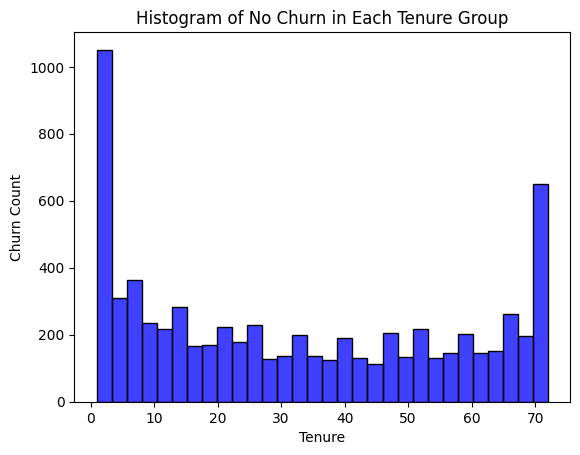

In [ ]:
# This one
# Create a new column for Churn = 'Yes' as 1, otherwise 0
df['Churn_N'] = df['Churn'].apply(lambda x: 1 if x == 'No' else 1)

# Use the original DataFrame with the new column
sns.histplot(x='tenure', weights='Churn_N', data=df, bins=30, color="blue")

# Add title and labels
plt.title("Histogram of No Churn in Each Tenure Group")
plt.xlabel('Tenure')
plt.ylabel('Churn Count')

# Show plot
plt.show()


# **Bar graph checking which gender has high churn rate**

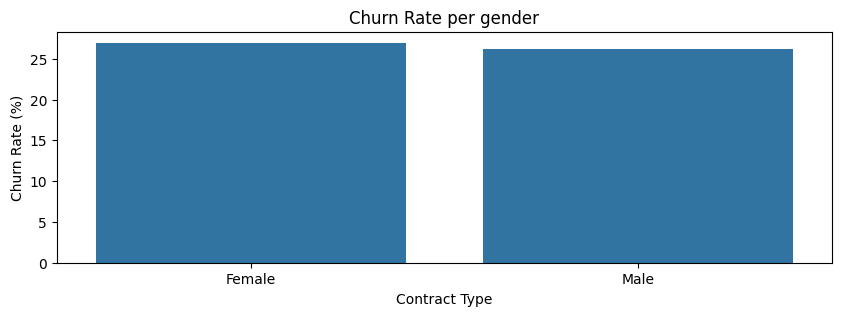

In [ ]:


# Set the width and height of the figure
plt.figure(figsize=(10,3))



# Calculate churn rates per contract type
churn_rates = df.groupby('gender')['Churn'].value_counts(normalize=True).mul(100).rename('Churn Rate (%)').reset_index()
churn_rates = churn_rates[churn_rates['Churn'] == 'Yes'] # Filter for churned customers only.

# Create the bar plot that shows custo
sns.barplot(x='gender', y='Churn Rate (%)', data=churn_rates)
plt.title('Churn Rate per gender')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.show()



# **Bar graph checking which Contract type has high churn rate**

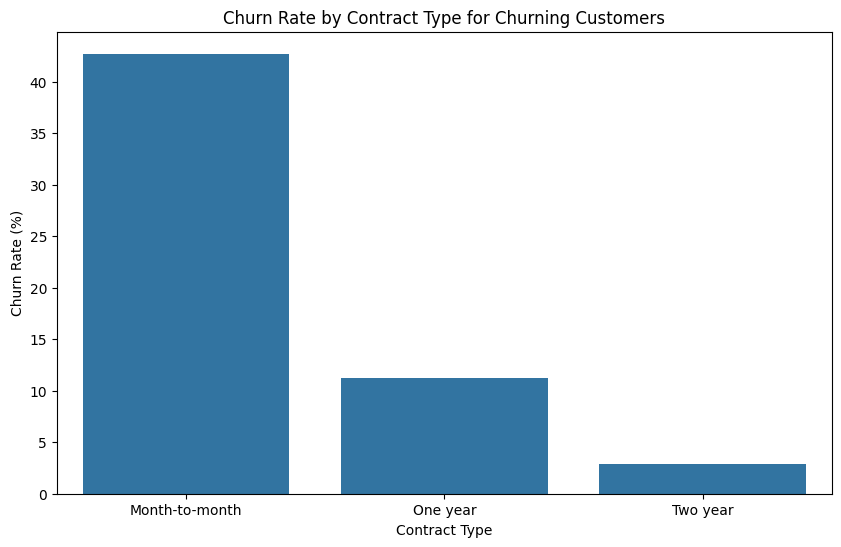

In [ ]:


# Set the width and height of the figure
plt.figure(figsize=(10,6))



# Calculate churn rates per contract type
churn_rates = df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).rename('Churn Rate (%)').reset_index()
churn_rates = churn_rates[churn_rates['Churn'] == 'Yes'] # Filter for churned customers only.

# Create the bar plot that shows custo
sns.barplot(x='Contract', y='Churn Rate (%)', data=churn_rates)
plt.title('Churn Rate by Contract Type for Churning Customers')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.show()



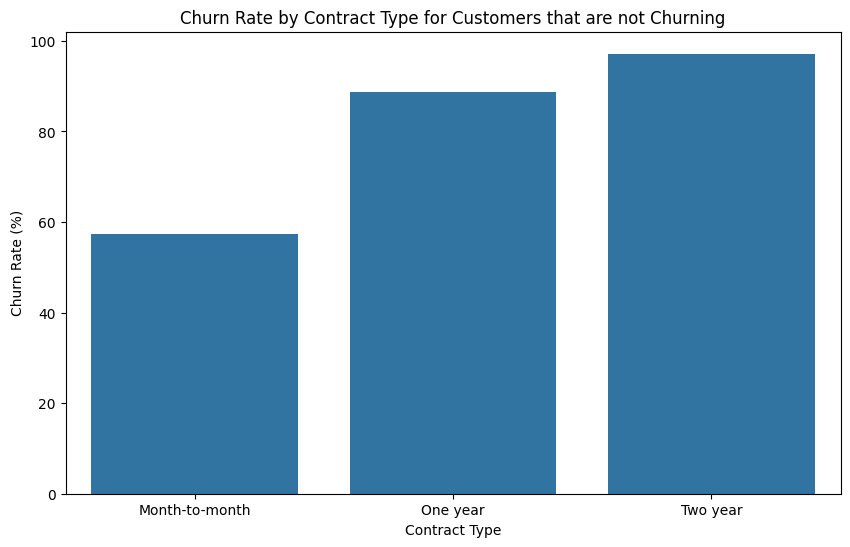

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))



# Calculate churn rates per contract type
churn_rates = df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).rename('Churn Rate (%)').reset_index()
churn_rates = churn_rates[churn_rates['Churn'] == 'No'] # Filter for churned customers only.




# Create the bar plot that shows customers that dont churn
sns.barplot(x='Contract', y='Churn Rate (%)', data=churn_rates)
plt.title('Churn Rate by Contract Type for Customers that are not Churning')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.show()

## **Dropping the customer ID**

In [ ]:
# its an irrelevant column and doesn't to churn
df.drop(columns=["customerID"], inplace=True)

## **Since there were Issues with the Total charges having empty spaces. The code below will replace the empty spaces with the mean value of total charges column**

In [ ]:


#  Replacing empty spaces with NaN
df1['TotalCharges'] = df1['TotalCharges'].replace(' ', np.nan)

df1['TotalCharges'] = df1['TotalCharges'].astype(float) # converting Total Charges to float since it is an object type

MeanTotalCharges = df1['TotalCharges'].mean()# calculating the mean


# Replacing NaN values with the mean
df1['TotalCharges'] = df1['TotalCharges'].fillna(MeanTotalCharges)

# Checking to see if the NaN was replaced
print(df1['TotalCharges'].isnull().sum()) # Should print 0

0


## **Separating the numerical values from categorical values**

In [ ]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df1[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

categorical_features.remove('Churn') # Churn is removed because its the target value

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges




```
# This is formatted as code
```

## **Encoding Data using a Label Encoder**

In [ ]:
# Using one hot encoding
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Identify categorical (text) features
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('One-Hot Encoding Transformation')

for i in text_data_features:
    transformed_data = encoder.fit_transform(df1[[i]])  # Ensure input is 2D
    feature_names = encoder.get_feature_names_out([i])  # Get new column names

    # Convert to DataFrame and concatenate with df1
    df_encoded = pd.DataFrame(transformed_data, columns=feature_names, index=df1.index)
    df1 = pd.concat([df1.drop(columns=[i]), df_encoded], axis=1)

print("Updated DataFrame with One-Hot Encoding applied:")
print(df1.head())



One-Hot Encoding Transformation
Updated DataFrame with One-Hot Encoding applied:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85          0.0   
1              0      34           56.95       1889.50          1.0   
2              0       2           53.85        108.15          1.0   
3              0      45           42.30       1840.75          1.0   
4              0       2           70.70        151.65          0.0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0          1.0             0.0               0.0   
1          0.0             0.0               1.0   
2          0.0             0.0               1.0   
3          0.0             0.0               0.0   
4          0.0             0.0               1.0   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                             1.0                0.0  ...              0.0   
1                      

## **Describing the stats of the encoded data**

In [ ]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **How the categorical data section looks like after the label encoding process**

In [ ]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## **Average amount of customers who churn vs who don't churn**

<ipython-input-25-5c40bbcfc829>:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout(pad = 0)


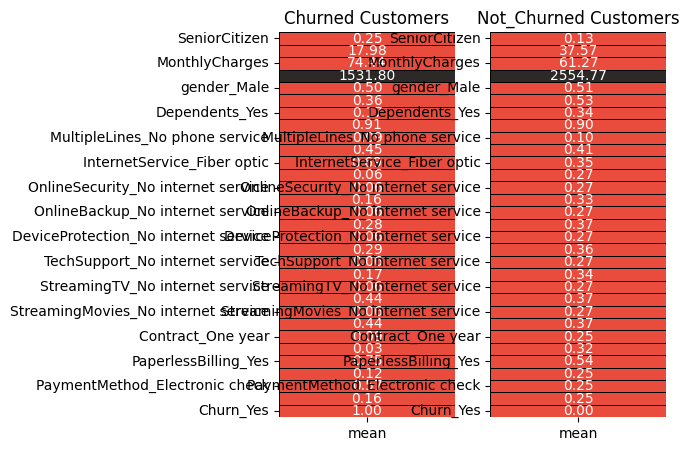

In [ ]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn_Yes'] == 1].describe().T
not_churn = df1[df1['Churn_Yes'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

## **Data Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])

df1.head()# Showing how the scaled data looks like after scaling


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,0.472222,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.027778,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.027778,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## **Extracting features and target values**

In [ ]:
f1 = df1.iloc[:,:19].values
t1 = df1.iloc[:,19].values


## **Spliting the train, test and validation**

In [ ]:
from sklearn.model_selection import train_test_split

# First, split into 80% train and 20% temp (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(f1, t1, test_size=0.2, random_state=2, stratify=t1)

# Now split the remaining 20% into 10% test and 10% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


## **Installing the required libraries**

In [ ]:
#pip install  tfkan

In [ ]:
#!pip uninstall tensorflow numpy ml-dtypes -y
#!pip install numpy==1.24.3
#!pip install tensorflow==2.13.0


## **Importing the required libraries**

In [ ]:
from tfkan.layers import DenseKAN
from tensorflow import keras

## **Mounting on drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **loading the model**

In [ ]:
model = keras.models.load_model(
    '/content/drive/My Drive/TFKAN_Model.keras',
    custom_objects={'DenseKAN': DenseKAN}
)

## **Loading the saved splits**

In [ ]:
import numpy as np

# Adjust the path if needed
splits = np.load('/content/drive/My Drive/churn_splits.npz')

X_train = splits['X_train']
X_val = splits['X_val']
X_test = splits['X_test']
y_train = splits['y_train']
y_val = splits['y_val']
y_test = splits['y_test']


## **Evaluating the model on the test set again**

In [ ]:
# Get predicted probabilities or outputs
y_pred_probs = model.predict(X_test)

# If it's a regression output like in 'mse', threshold it for classification
y_pred = (y_pred_probs > 0.5).astype(int)


23/23 [==============================] - 2s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Evaluation on Test Set:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Evaluation on Test Set:
Accuracy : 0.9858
Precision: 0.9851
Recall   : 0.9659
F1 Score : 0.9754


## **Using feature slicing on KAN**

## **Defining the evaluation function**

In [ ]:
from sklearn.metrics import f1_score
import pandas as pd

def evaluate_feature_slices(X_df, y_true, y_pred, feature, bins=None, labels=None):
    print(f"\n=== Feature Slicing for: {feature} ===")

    if bins:
        X_df[f"{feature}_bin"] = pd.cut(X_df[feature], bins=bins, labels=labels)
        groups = X_df[f"{feature}_bin"].unique()
        for g in groups:
            idx = X_df[f"{feature}_bin"] == g
            if idx.sum() == 0: continue
            score = f1_score(y_true[idx], y_pred[idx], zero_division=0)
            print(f"{feature} = {g}: F1 Score = {score:.4f}")
    else:
        idx_1 = X_df[feature] == 1
        idx_0 = X_df[feature] == 0
        if idx_1.sum() > 0:
            score_1 = f1_score(y_true[idx_1], y_pred[idx_1], zero_division=0)
            print(f"{feature} = 1: F1 Score = {score_1:.4f}")
        if idx_0.sum() > 0:
            score_0 = f1_score(y_true[idx_0], y_pred[idx_0], zero_division=0)
            print(f"{feature} = 0: F1 Score = {score_0:.4f}")


## **Running Feature-slicing across all the relevant features**

In [ ]:
column_names = [
    'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
    'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
    'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_feature_slices(X_df, y_true, y_pred, feature, bins=None, labels=None):
    print(f"\n=== Feature Slicing for: {feature} ===")
    metrics = []

    if bins:
        X_df[f"{feature}_bin"] = pd.cut(X_df[feature], bins=bins, labels=labels)
        groups = X_df[f"{feature}_bin"].unique()

        for g in groups:
            idx = X_df[f"{feature}_bin"] == g
            if idx.sum() == 0:
                continue
            yt = y_true[idx]
            yp = y_pred[idx]

            metrics.append({
                'Feature': feature,
                'Slice': str(g),
                'Accuracy': accuracy_score(yt, yp),
                'Precision': precision_score(yt, yp, zero_division=0),
                'Recall': recall_score(yt, yp, zero_division=0),
                'F1 Score': f1_score(yt, yp, zero_division=0)
            })

    else:
        for val in [0, 1]:
            idx = X_df[feature] == val
            if idx.sum() == 0:
                continue
            yt = y_true[idx]
            yp = y_pred[idx]

            metrics.append({
                'Feature': feature,
                'Slice': f'{feature} = {val}',
                'Accuracy': accuracy_score(yt, yp),
                'Precision': precision_score(yt, yp, zero_division=0),
                'Recall': recall_score(yt, yp, zero_division=0),
                'F1 Score': f1_score(yt, yp, zero_division=0)
            })

    df = pd.DataFrame(metrics)
    print(df.to_string(index=False))
    return df  # Add this line to enable collection for plotting


In [ ]:
# Scaled features
for feature, bins in scaled_features.items():
    evaluate_feature_slices(
        X_df, y_test, y_pred,
        feature=feature,
        bins=bins,
        labels=["Low", "Mid-Low", "Mid-High", "High"]
    )

# Categorical features
for feature in categorical_features:
    evaluate_feature_slices(X_df, y_test, y_pred, feature=feature)



=== Feature Slicing for: tenure ===
Feature    Slice  Accuracy  Precision   Recall  F1 Score
 tenure  Mid-Low  0.992063   1.000000 0.972222  0.985915
 tenure      Low  0.989547   0.951220 0.975000  0.962963
 tenure Mid-High  1.000000   1.000000 1.000000  1.000000
 tenure     High  0.966480   0.987952 0.942529  0.964706

=== Feature Slicing for: MonthlyCharges ===
       Feature    Slice  Accuracy  Precision   Recall  F1 Score
MonthlyCharges Mid-High  0.987234   1.000000 0.960526  0.979866
MonthlyCharges  Mid-Low  0.985612   0.960784 1.000000  0.980000
MonthlyCharges     High  0.965986   0.984615 0.941176  0.962406
MonthlyCharges      Low  1.000000   1.000000 1.000000  1.000000

=== Feature Slicing for: TotalCharges ===
     Feature    Slice  Accuracy  Precision   Recall  F1 Score
TotalCharges      Low  0.990698   0.968254 0.968254  0.968254
TotalCharges  Mid-Low  1.000000   1.000000 1.000000  1.000000
TotalCharges     High  0.913793   0.971429 0.894737  0.931507
TotalCharges Mid-High 

In [ ]:
import pandas as pd

# Store results for plotting
all_metrics = []

# Scaled features
for feature, bins in scaled_features.items():
    df = evaluate_feature_slices(
        X_df, y_test, y_pred,
        feature=feature,
        bins=bins,
        labels=["Low", "Mid-Low", "Mid-High", "High"]
    )
    all_metrics.append(df)

# Categorical features
for feature in categorical_features:
    df = evaluate_feature_slices(X_df, y_test, y_pred, feature=feature)
    all_metrics.append(df)

# Concatenate all results into one DataFrame
results_df = pd.concat(all_metrics, ignore_index=True)



=== Feature Slicing for: tenure ===
Feature    Slice  Accuracy  Precision   Recall  F1 Score
 tenure  Mid-Low  0.992063   1.000000 0.972222  0.985915
 tenure      Low  0.989547   0.951220 0.975000  0.962963
 tenure Mid-High  1.000000   1.000000 1.000000  1.000000
 tenure     High  0.966480   0.987952 0.942529  0.964706

=== Feature Slicing for: MonthlyCharges ===
       Feature    Slice  Accuracy  Precision   Recall  F1 Score
MonthlyCharges Mid-High  0.987234   1.000000 0.960526  0.979866
MonthlyCharges  Mid-Low  0.985612   0.960784 1.000000  0.980000
MonthlyCharges     High  0.965986   0.984615 0.941176  0.962406
MonthlyCharges      Low  1.000000   1.000000 1.000000  1.000000

=== Feature Slicing for: TotalCharges ===
     Feature    Slice  Accuracy  Precision   Recall  F1 Score
TotalCharges      Low  0.990698   0.968254 0.968254  0.968254
TotalCharges  Mid-Low  1.000000   1.000000 1.000000  1.000000
TotalCharges     High  0.913793   0.971429 0.894737  0.931507
TotalCharges Mid-High 

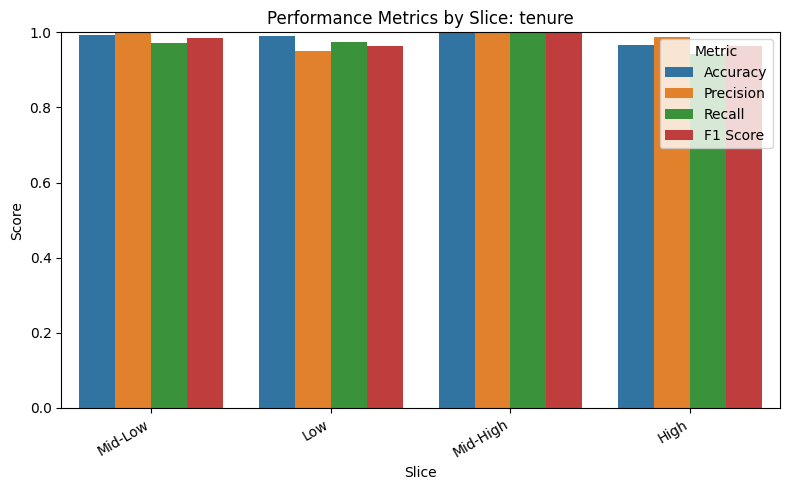

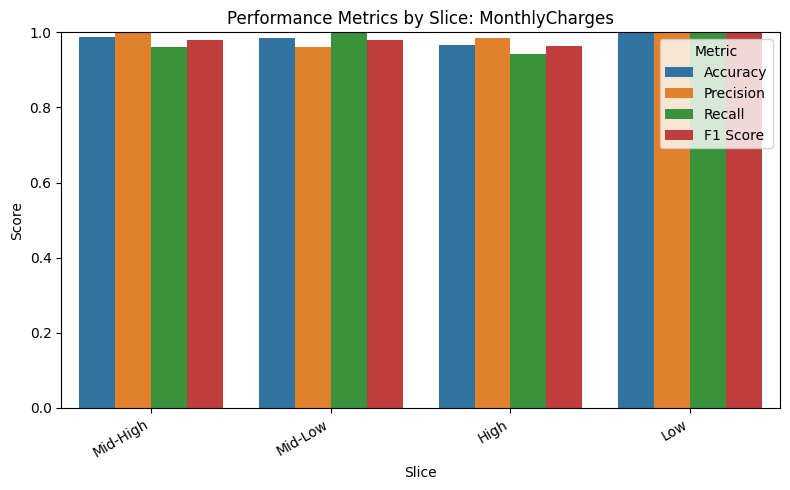

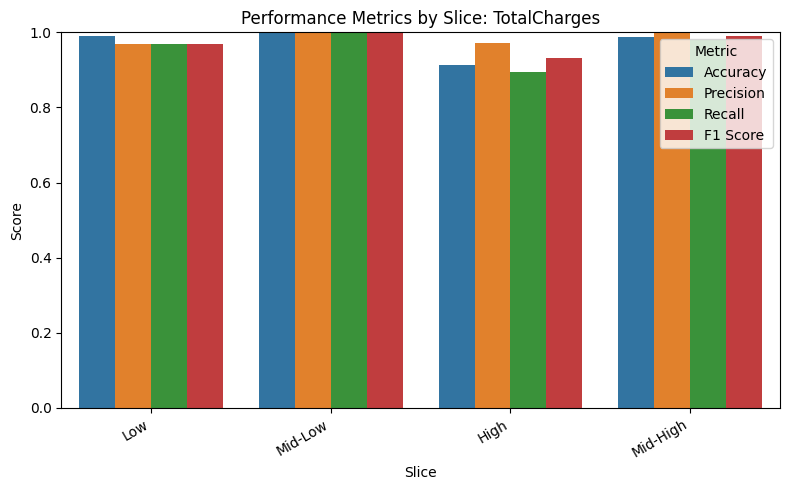

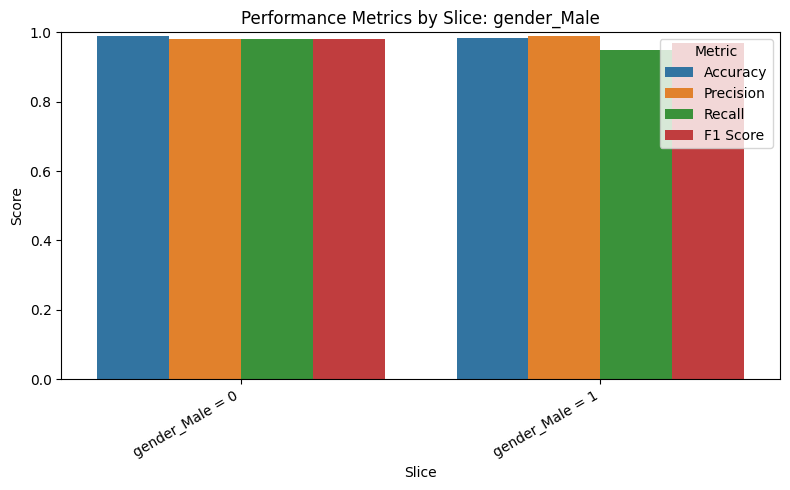

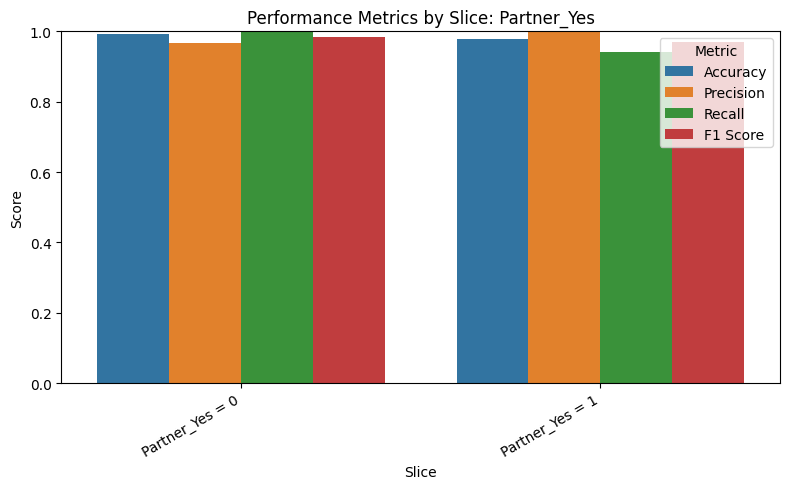

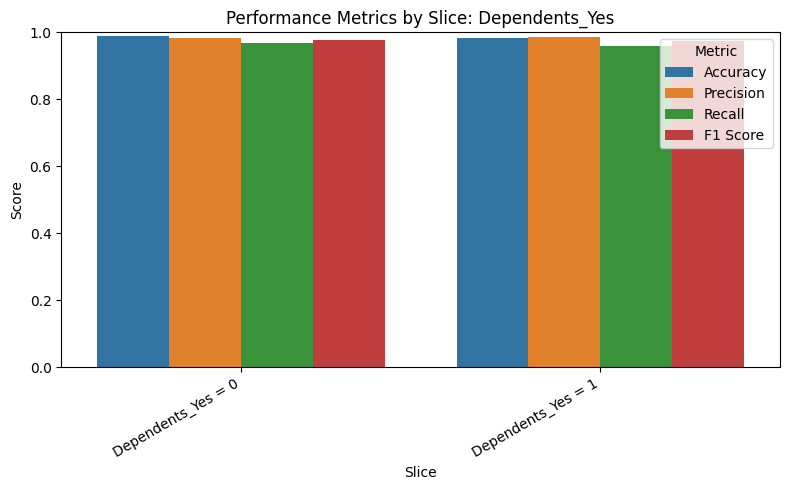

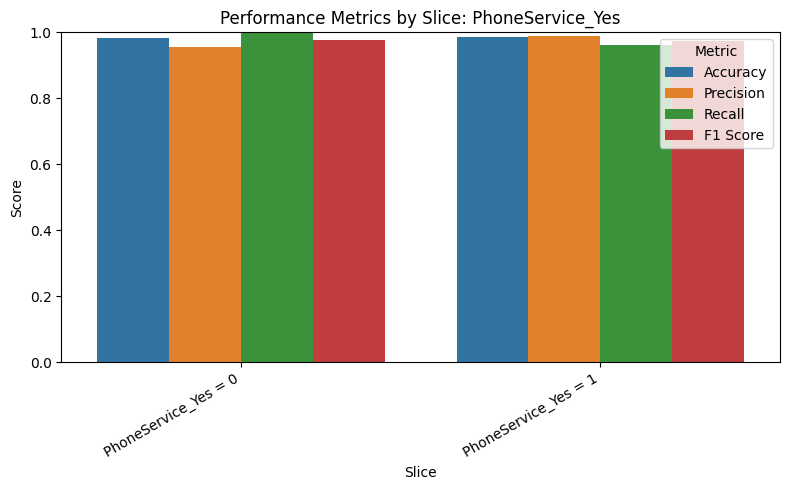

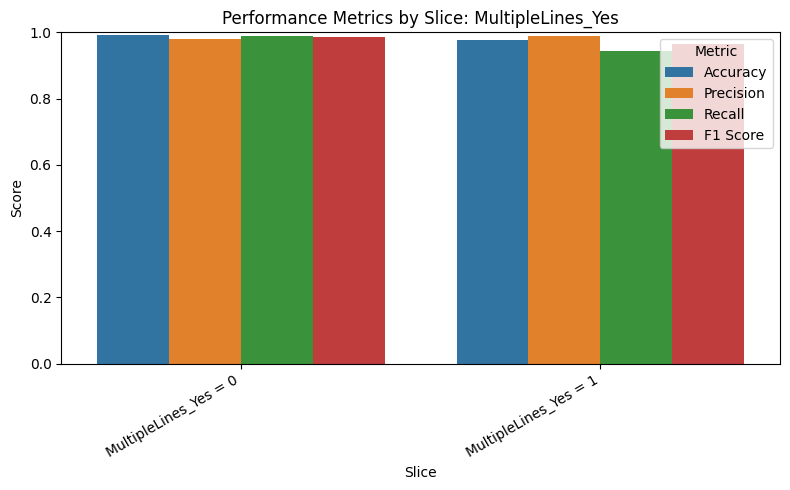

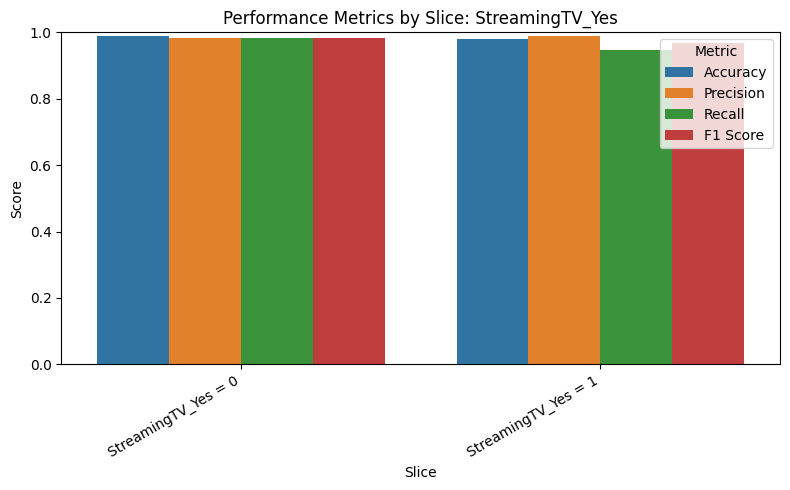

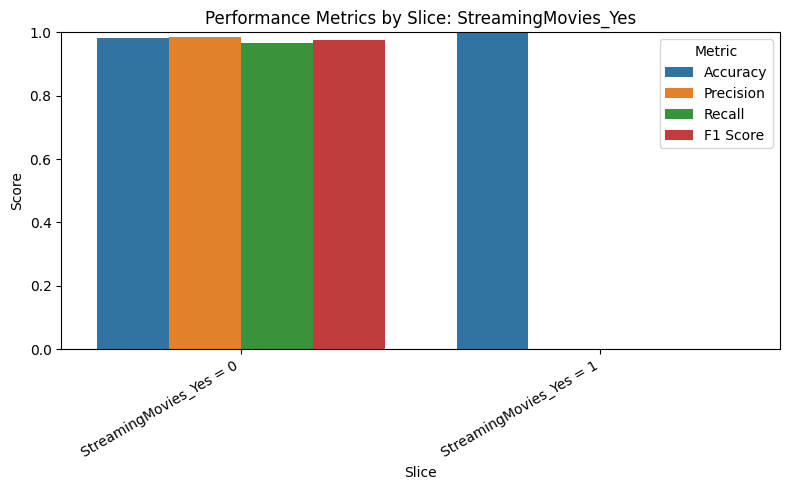

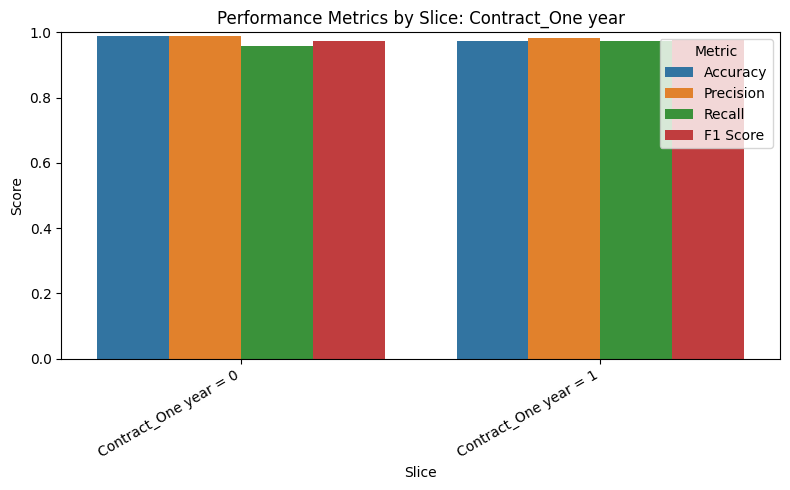

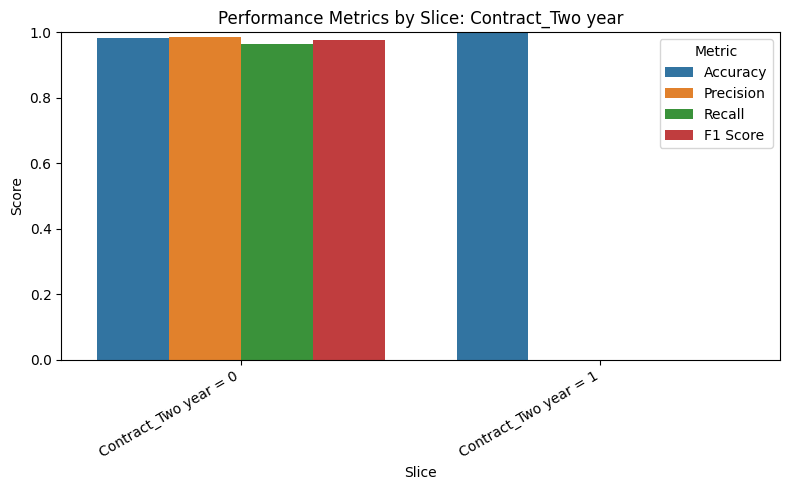

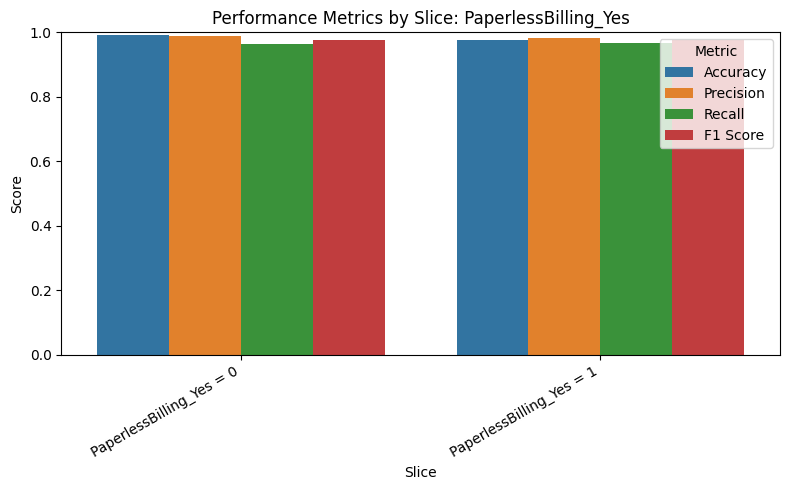

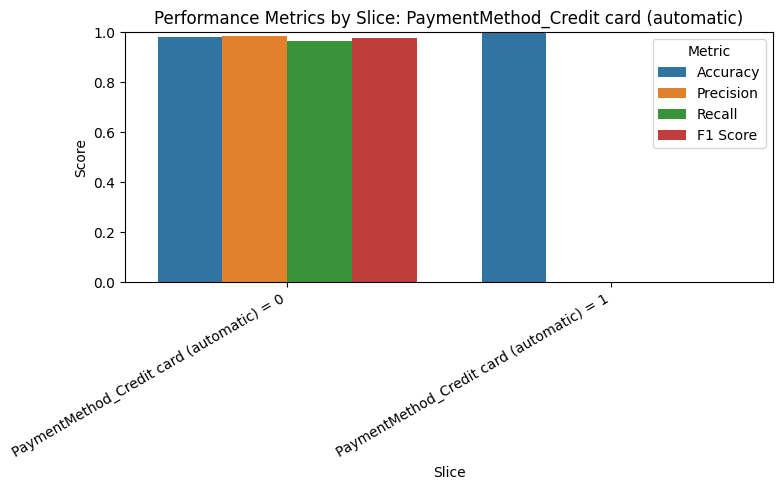

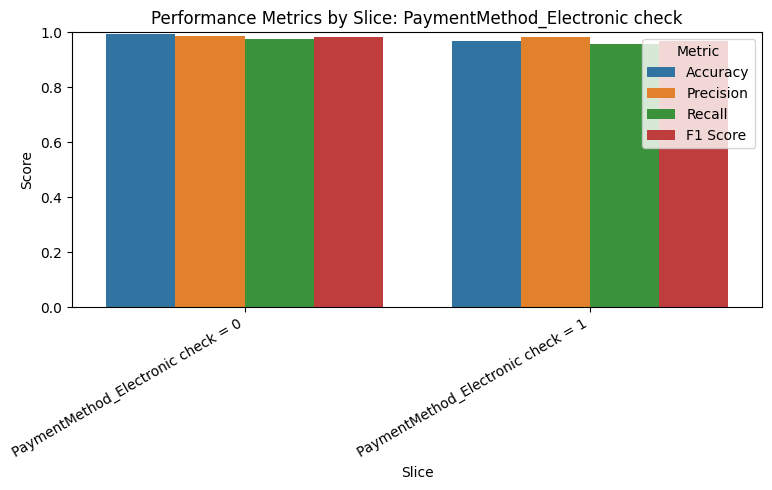

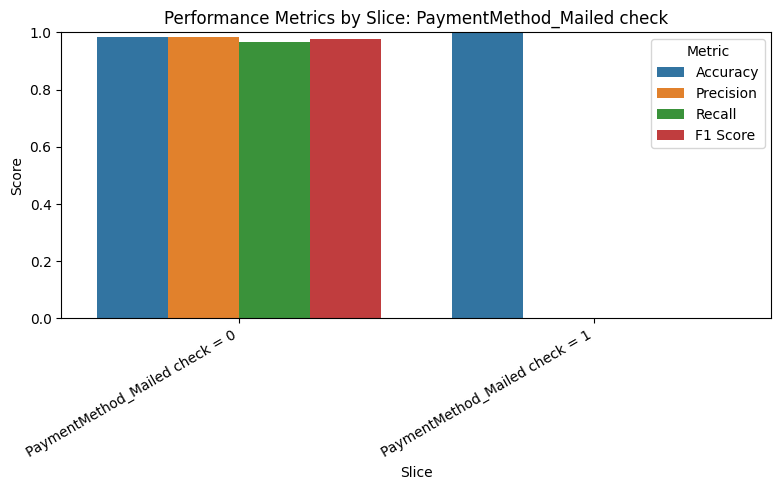

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop over each unique feature and plot separately
for feature in results_df['Feature'].unique():
    feature_df = results_df[results_df['Feature'] == feature]

    # Melt for seaborn
    melted = pd.melt(feature_df,
                     id_vars=["Feature", "Slice"],
                     value_vars=["Accuracy", "Precision", "Recall", "F1 Score"],
                     var_name="Metric", value_name="Score")

    plt.figure(figsize=(8, 5))
    sns.barplot(data=melted, x="Slice", y="Score", hue="Metric")
    plt.title(f"Performance Metrics by Slice: {feature}")
    plt.ylim(0, 1.0)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
